FMLCV Project

Julia Nowak

Alexander De Nys

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [2]:
airline=pd.read_csv('airline_passenger_satisfaction.csv')

In [3]:
airline.head(10)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
5,6,Male,43,Returning,Business,Business,3788,0,0.0,4,...,4,4,4,3,3,4,4,4,4,Satisfied
6,7,Male,43,Returning,Business,Business,1963,0,0.0,3,...,5,5,5,4,5,5,3,5,5,Satisfied
7,8,Female,60,Returning,Business,Business,853,0,3.0,3,...,3,4,4,4,4,3,4,3,3,Satisfied
8,9,Male,50,Returning,Business,Business,2607,0,0.0,1,...,4,3,4,3,3,4,4,4,4,Neutral or Dissatisfied
9,10,Female,38,Returning,Business,Business,2822,13,0.0,2,...,5,4,5,4,2,5,2,5,5,Satisfied


In [4]:
airline.shape

(129880, 24)

In [5]:
# Checking null values

airline.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [6]:
#handle missing values in column Arrival Delay

fill_list = airline['Arrival Delay'].dropna()
airline['Arrival Delay'] = airline['Arrival Delay'].fillna(pd.Series(np.random.choice(fill_list , size = len(airline.index))))


In [7]:
airline.isnull().sum()

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

In [8]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129880 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

# Encoding 

In [9]:
airline['Gender'].value_counts()

Gender
Female    65899
Male      63981
Name: count, dtype: int64

In [10]:
airline['Customer Type'].value_counts()

Customer Type
Returning     106100
First-time     23780
Name: count, dtype: int64

In [11]:
airline['Type of Travel'].value_counts()

Type of Travel
Business    89693
Personal    40187
Name: count, dtype: int64

In [12]:
airline['Class'].value_counts()

Class
Business        62160
Economy         58309
Economy Plus     9411
Name: count, dtype: int64

In [13]:
airline['Satisfaction'].value_counts()

Satisfaction
Neutral or Dissatisfied    73452
Satisfied                  56428
Name: count, dtype: int64

In [14]:
gender_le=LabelEncoder()
Customer_Type_le=LabelEncoder()
Type_of_Travel=LabelEncoder()
Class=LabelEncoder()
Satisfaction=LabelEncoder()

In [15]:
#convert categorial data to numeric
airline['Gender']=gender_le.fit_transform(airline['Gender'])
airline['Customer Type']=Customer_Type_le.fit_transform(airline['Customer Type'])
airline['Type of Travel']=Type_of_Travel.fit_transform(airline['Type of Travel'])
airline['Class']=Class.fit_transform(airline['Class'])
airline['Satisfaction']=Satisfaction.fit_transform(airline['Satisfaction'])

In [16]:
airline.head(10)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,1,48,0,0,0,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,0
1,2,0,35,1,0,0,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,1
2,3,1,41,1,0,0,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,1
3,4,1,50,1,0,0,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,1
4,5,0,49,1,0,0,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,1
5,6,1,43,1,0,0,3788,0,0.0,4,...,4,4,4,3,3,4,4,4,4,1
6,7,1,43,1,0,0,1963,0,0.0,3,...,5,5,5,4,5,5,3,5,5,1
7,8,0,60,1,0,0,853,0,3.0,3,...,3,4,4,4,4,3,4,3,3,1
8,9,1,50,1,0,0,2607,0,0.0,1,...,4,3,4,3,3,4,4,4,4,0
9,10,0,38,1,0,0,2822,13,0.0,2,...,5,4,5,4,2,5,2,5,5,1


In [17]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  int64  
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  int64  
 4   Type of Travel                          129880 non-null  int64  
 5   Class                                   129880 non-null  int64  
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129880 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

ID                                            Axes(0.125,0.77;0.168478x0.11)
Gender                                     Axes(0.327174,0.77;0.168478x0.11)
Age                                        Axes(0.529348,0.77;0.168478x0.11)
Customer Type                              Axes(0.731522,0.77;0.168478x0.11)
Type of Travel                               Axes(0.125,0.638;0.168478x0.11)
Class                                     Axes(0.327174,0.638;0.168478x0.11)
Flight Distance                           Axes(0.529348,0.638;0.168478x0.11)
Departure Delay                           Axes(0.731522,0.638;0.168478x0.11)
Arrival Delay                                Axes(0.125,0.506;0.168478x0.11)
Departure and Arrival Time Convenience    Axes(0.327174,0.506;0.168478x0.11)
Ease of Online Booking                    Axes(0.529348,0.506;0.168478x0.11)
Check-in Service                          Axes(0.731522,0.506;0.168478x0.11)
Online Boarding                              Axes(0.125,0.374;0.168478x0.11)

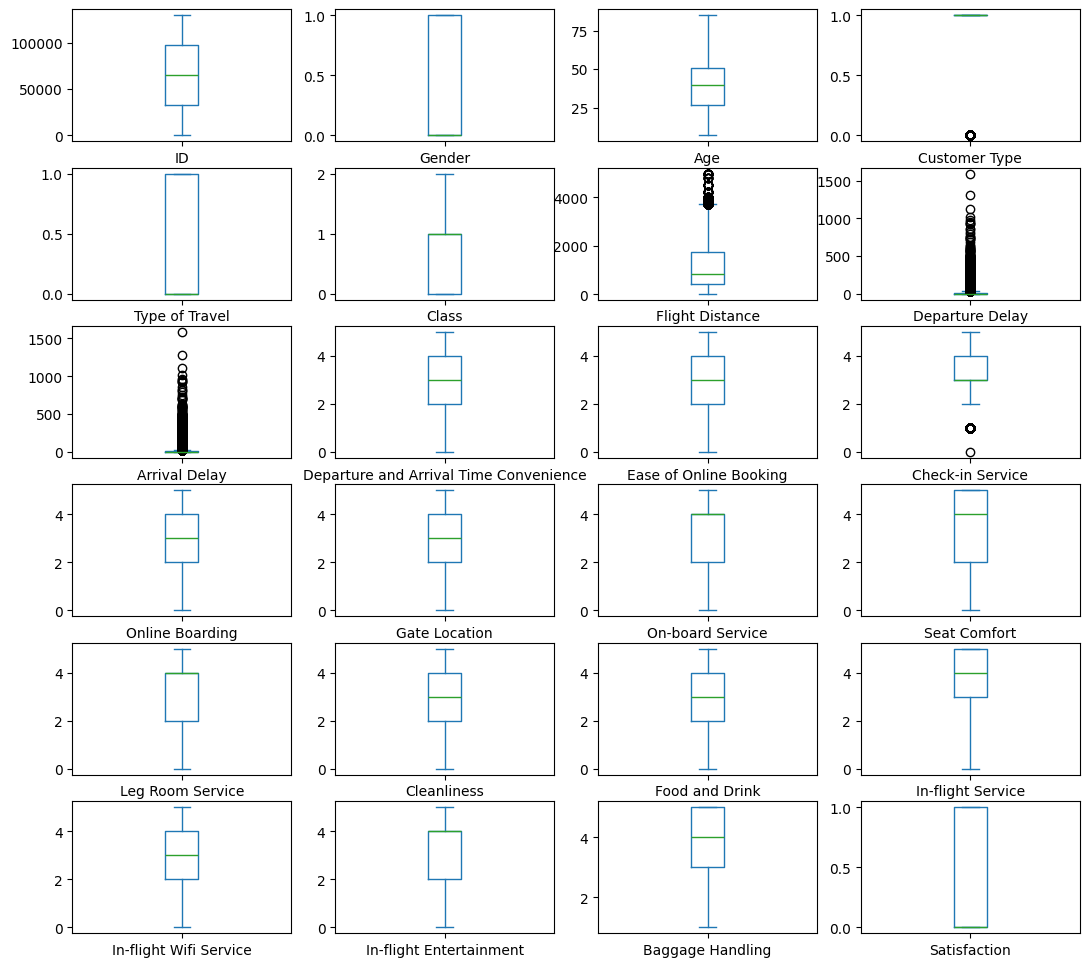

In [18]:
# detect ouliers

airline.plot(kind="box", subplots=True, layout=(6,4), figsize=(13,12))

## Removing Outliers

In [19]:
airline.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

## Removing Flight Distance Ouliers 

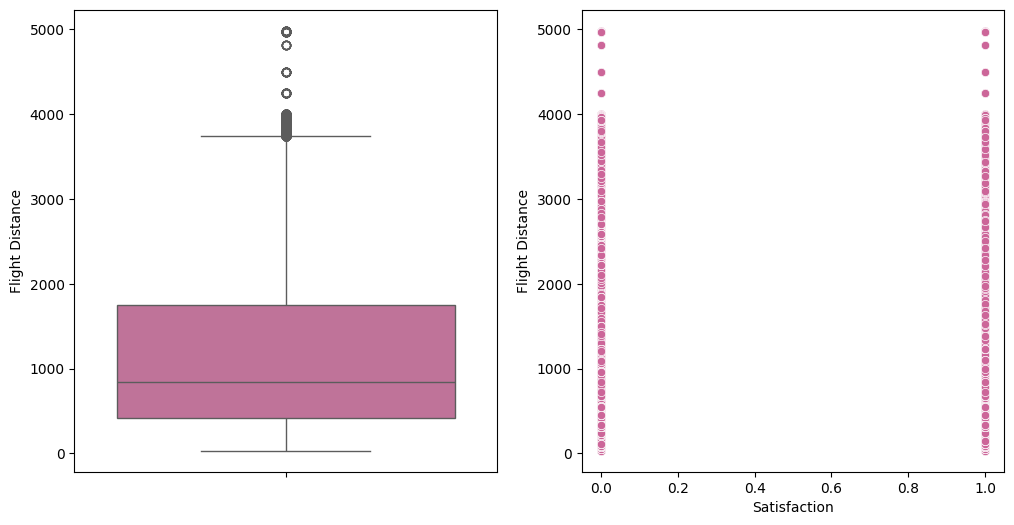

In [20]:
# Distribution Before Removing Outliers 

plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=airline,y='Flight Distance',color='#cc6699')
plt.subplot(1, 2, 2)
sns.scatterplot(data=airline,x='Satisfaction',y='Flight Distance',color='#cc6699')
plt.show()

In [21]:
x=airline[airline['Flight Distance']>4000]
x.shape

(78, 24)

In [22]:
airline=airline[airline['Flight Distance']<=4000]

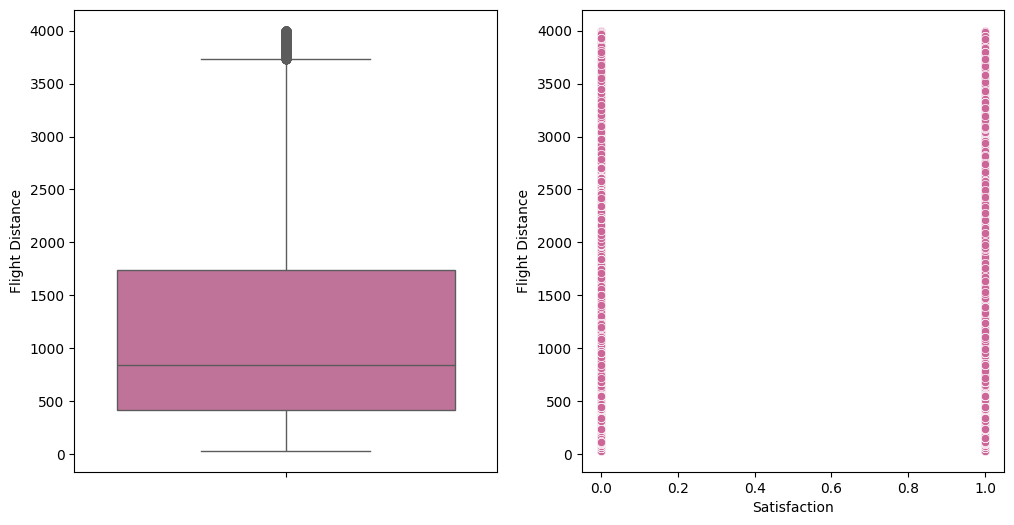

In [23]:
# Distribution After Removing Outliers 

plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=airline,y='Flight Distance',color='#cc6699')
plt.subplot(1, 2, 2)
sns.scatterplot(data=airline,x='Satisfaction',y='Flight Distance',color='#cc6699')
plt.show()

### Removing Outliers Didn't Change The Distribution

## Removing Departure Delay Ouliers 

### Distribution Before Removing Outliers 

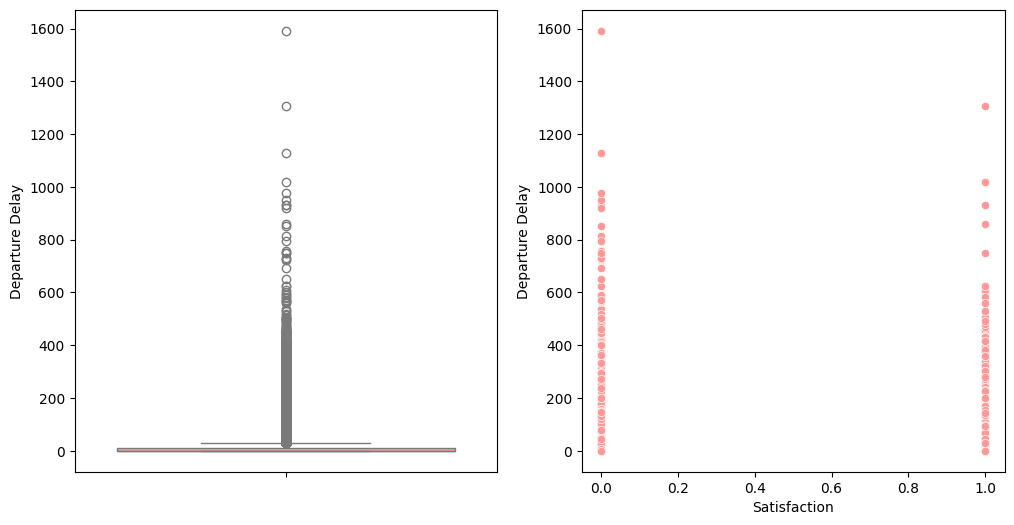

In [24]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=airline,y='Departure Delay',color='#ff9999')
plt.subplot(1, 2, 2)
sns.scatterplot(data=airline,x='Satisfaction',y='Departure Delay',color='#ff9999')
plt.show()

In [25]:
x=airline[airline['Departure Delay']>600]
x.shape

(24, 24)

In [26]:
airline=airline[airline['Departure Delay']<=600]

### Distribution After Removing Outliers 

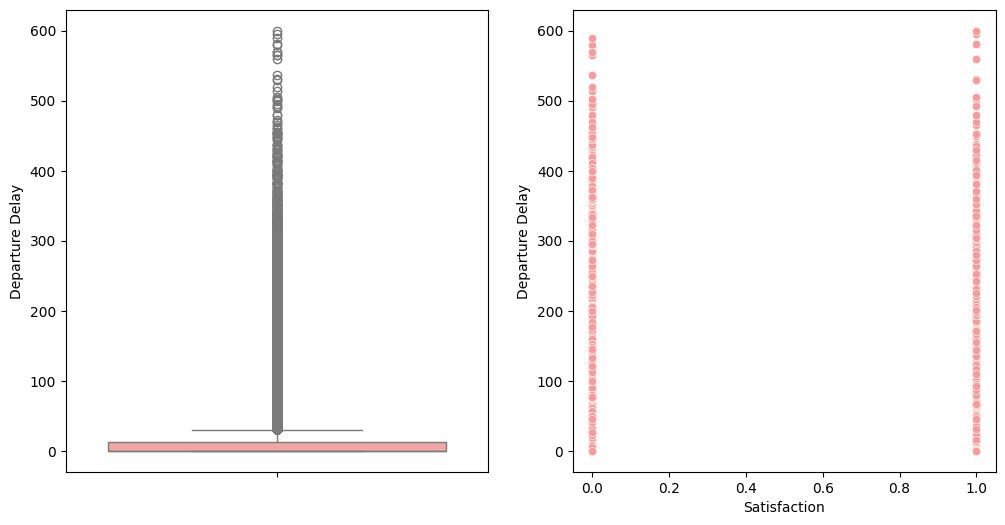

In [27]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=airline,y='Departure Delay',color='#ff9999')
plt.subplot(1, 2, 2)
sns.scatterplot(data=airline,x='Satisfaction',y='Departure Delay',color='#ff9999')
plt.show()

### Removing Outliers Didn't Change The Distribution

## Removing Arrival Delay Ouliers 

### Distribution Before Removing Outliers 

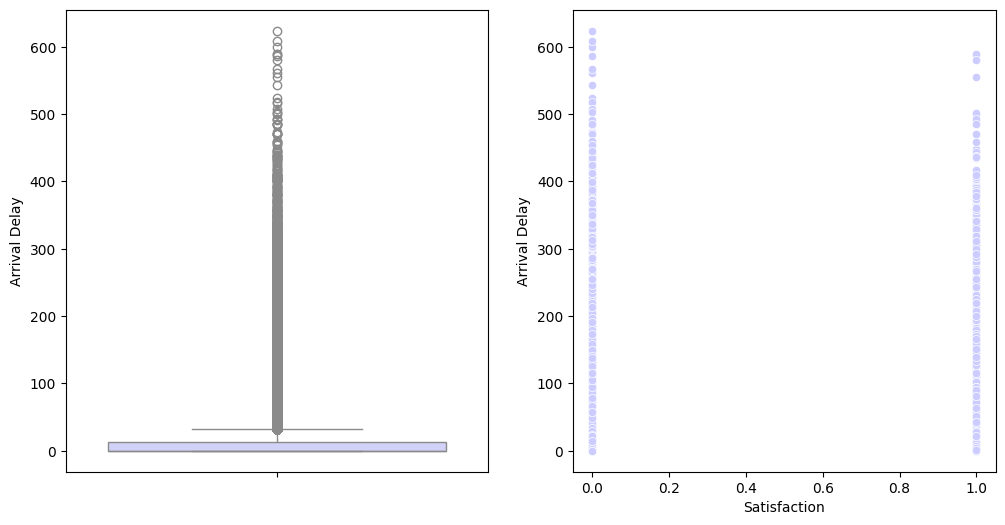

In [28]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=airline,y='Arrival Delay',color='#ccccff')
plt.subplot(1, 2, 2)
sns.scatterplot(data=airline,x='Satisfaction',y='Arrival Delay',color='#ccccff')
plt.show()

In [29]:
x=airline[airline['Arrival Delay']>=500]
x.shape

(18, 24)

In [30]:
airline=airline[airline['Arrival Delay']<500]

### Distribution After Removing Outliers 

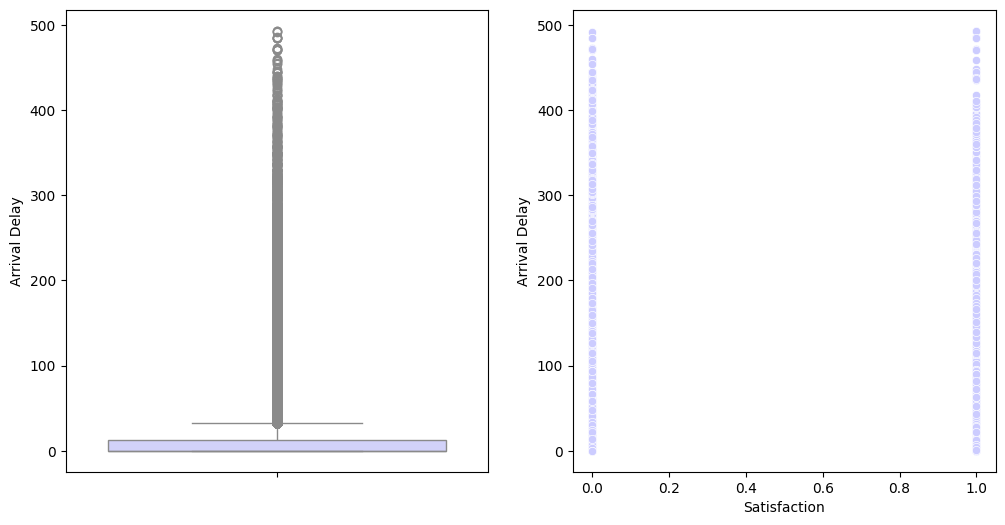

In [31]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=airline,y='Arrival Delay',color='#ccccff')
plt.subplot(1, 2, 2)
sns.scatterplot(data=airline,x='Satisfaction',y='Arrival Delay',color='#ccccff')
plt.show()

### Removing Outliers Didn't Change The Distribution

In [32]:
airline.shape

(129760, 24)

In [33]:
airline.drop('ID',axis=1,inplace=True)

In [34]:
airline.columns

Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [35]:
airline.drop('Gate Location',axis=1,inplace=True)
airline.drop('Gender',axis=1,inplace=True)
airline.drop('Flight Distance',axis=1,inplace=True)
airline.drop('Departure Delay',axis=1,inplace=True)
airline.drop('Arrival Delay',axis=1,inplace=True)

# Modeling 

## Splitting Data 

In [36]:
x = airline.drop(['Satisfaction'] , axis = 1).values
y= airline['Satisfaction' ].values
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.2 , random_state=42)

## KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, cohen_kappa_score

def knn_classifier(x_train, x_test, y_train, y_test, k_values=None):
    
    if k_values is None:
        k_values = [3, 5, 9, 11, 13, 19, 29, 49] 
    
    results = {}
    best_accuracy = 0
    best_model = None

    print("Running the kNN Classifier")
    for k in k_values:
        # initialize the kNN model
        knn = KNeighborsClassifier(n_neighbors=k)
        
        # train the model
        knn.fit(x_train, y_train)
        
        # predict on the test data
        y_pred = knn.predict(x_test)
        
        # evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        kappa = cohen_kappa_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        
        results[k] = {
            "accuracy": accuracy,
            "kappa": kappa,
            "confusion_matrix": cm,
            "classification_report": report,
        }
        
        print(f"Accuracy for k = {k}: {accuracy}")
        
        # track the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = knn

    # print general metrics for the best-performing k
    best_k = max(results, key=lambda k: results[k]["accuracy"])
    print("\nBest Performing k:", best_k)
    print("\nGeneral Evaluation Metrics:")
    print("Accuracy:", results[best_k]["accuracy"])
    print("Cohen's Kappa:", results[best_k]["kappa"])
    print("Confusion Matrix:\n", results[best_k]["confusion_matrix"])
    print("Classification Report:\n", classification_report(y_test, best_model.predict(x_test)))

    return best_model, results


In [38]:
# Example: Call the function with the data split
best_model, results = knn_classifier(x_train, x_test, y_train, y_test)


Running the kNN Classifier
Accuracy for k = 3: 0.9131473489519112
Accuracy for k = 5: 0.9143033292231812
Accuracy for k = 9: 0.9149969173859432
Accuracy for k = 11: 0.9148427866831073
Accuracy for k = 13: 0.9149969173859432
Accuracy for k = 19: 0.9125693588162762
Accuracy for k = 29: 0.9077913070283601
Accuracy for k = 49: 0.9022811344019729

Best Performing k: 9

General Evaluation Metrics:
Accuracy: 0.9149969173859432
Cohen's Kappa: 0.8251999513235486
Confusion Matrix:
 [[14052   742]
 [ 1464  9694]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93     14794
           1       0.93      0.87      0.90     11158

    accuracy                           0.91     25952
   macro avg       0.92      0.91      0.91     25952
weighted avg       0.92      0.91      0.91     25952



## kNN Function with Cross-Validation

In [39]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold


def knn_with_cross_validation(x, y, n_neighbors=5, cv_folds=5):
    
    # Scale the features
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)
    
    # Initialize kNN model
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Perform cross-validation
    stratified_kfold = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
    cv_scores = cross_val_score(knn_model, x_scaled, y, cv=stratified_kfold, scoring="accuracy")
    
    # Train the final model on the entire dataset
    knn_model.fit(x_scaled, y)
    
    # Print cross-validation results
    mean_cv_score = np.mean(cv_scores)
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean Cross-Validation Accuracy: {mean_cv_score:.4f}")
    
    return knn_model, mean_cv_score


In [40]:
# Train the kNN model with cross-validation
knn_model, mean_cv_score = knn_with_cross_validation(x, y, n_neighbors=5, cv_folds=5)


Cross-Validation Accuracy Scores: [0.93788533 0.9352651  0.93703761 0.93815506 0.93437885]
Mean Cross-Validation Accuracy: 0.9365


## Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def decision_tree_classifier(x_train, x_test, y_train, y_test, depths=None, random_state=42):
    
    if depths is None:
        depths = [4, 8, 12, 14, 16, 18, 20, 24, 28]
    
    results = {}
    best_accuracy = 0
    best_model = None

    print("Running the Decision Trees")
    for depth in depths:
        # initialize the Decision Tree Classifier with the given depth
        dt_model = DecisionTreeClassifier(max_depth=depth, random_state=random_state)
        
        # train the model
        dt_model.fit(x_train, y_train)
        
        # predict on test data
        y_pred = dt_model.predict(x_test)
        
        # evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        results[depth] = {
            "accuracy": accuracy,
            "classification_report": classification_report(y_test, y_pred, output_dict=True),
            "confusion_matrix": confusion_matrix(y_test, y_pred),
        }
        
        print(f"Accuracy for depth {depth}: {accuracy}")
        
        # track the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = dt_model

    print("\nBest Performing Depth:", max(results, key=lambda d: results[d]["accuracy"]))
    print("\nGeneral Evaluation Metrics:")
    print("Accuracy:", best_accuracy)
    print("\nClassification Report:\n", classification_report(y_test, best_model.predict(x_test)))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, best_model.predict(x_test)))

    return best_model, results


In [42]:
best_model, results = decision_tree_classifier(x_train, x_test, y_train, y_test)


Running the Decision Trees
Accuracy for depth 4: 0.8884093711467325
Accuracy for depth 8: 0.9343017879161529
Accuracy for depth 12: 0.9526818742293465
Accuracy for depth 14: 0.9548397040690506
Accuracy for depth 16: 0.9526433415536375
Accuracy for depth 18: 0.9518726880394575
Accuracy for depth 20: 0.9495221948212084
Accuracy for depth 24: 0.9460927866831073
Accuracy for depth 28: 0.9452836004932182

Best Performing Depth: 14

General Evaluation Metrics:
Accuracy: 0.9548397040690506

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     14794
           1       0.96      0.93      0.95     11158

    accuracy                           0.95     25952
   macro avg       0.96      0.95      0.95     25952
weighted avg       0.96      0.95      0.95     25952


Confusion Matrix:
 [[14396   398]
 [  774 10384]]


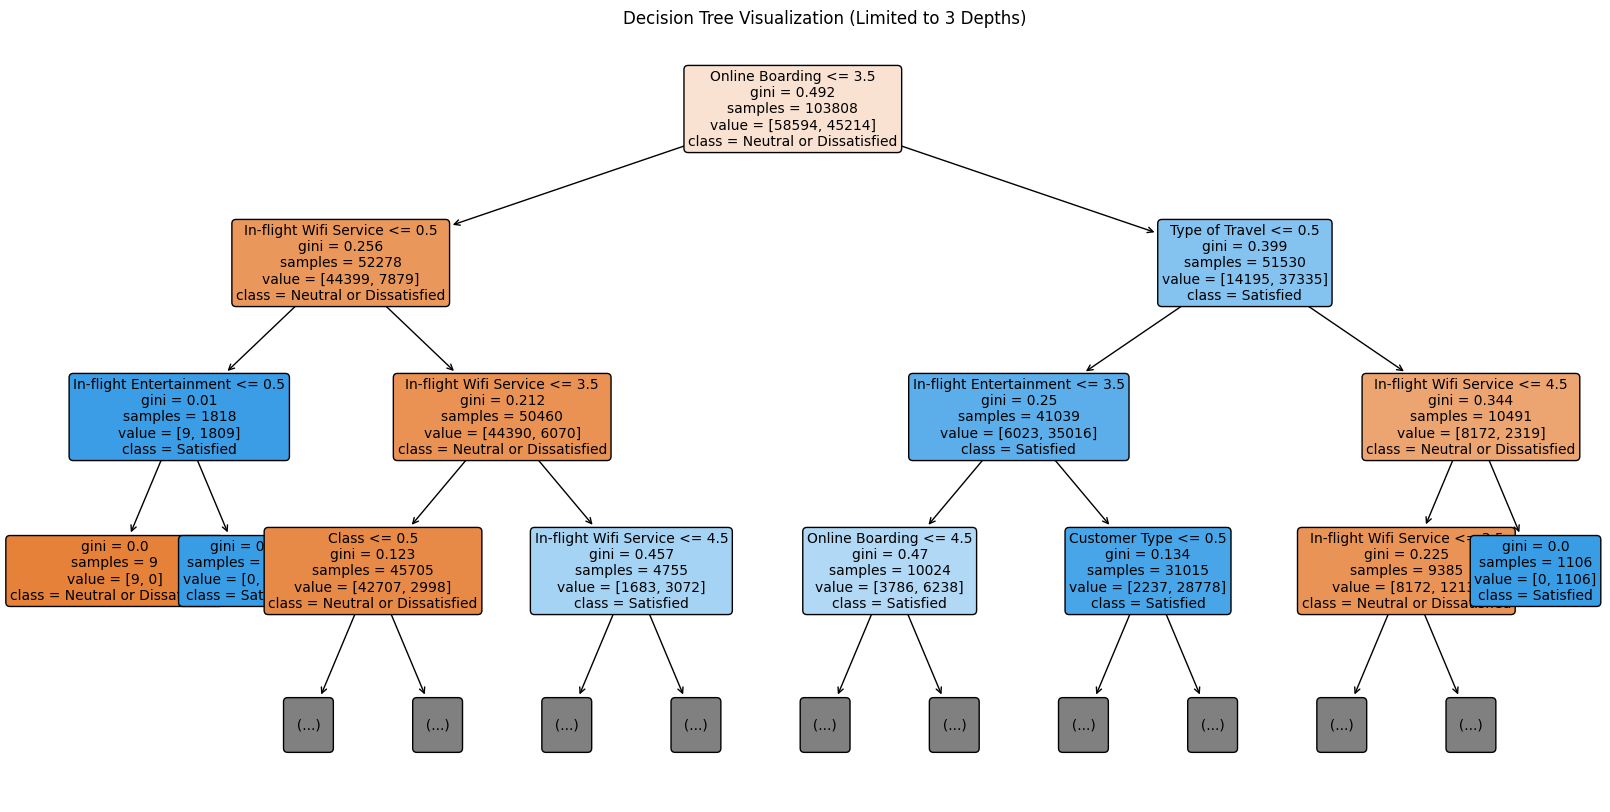

In [43]:
# Visualize the Decision Tree 
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(
    best_model,
    feature_names=airline.drop('Satisfaction', axis=1).columns,  
    class_names=["Neutral or Dissatisfied", "Satisfied"],  
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=3 
)
plt.title("Decision Tree Visualization (Limited to 3 Depths)")
plt.show()


## Linear Discriminant Analysis (LDA) 

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def lda_classifier(x_train, x_test, y_train, y_test):
    
    # initialize the LDA model
    lda_model = LinearDiscriminantAnalysis()
    
    # train the LDA model
    lda_model.fit(x_train, y_train)
    
    # predict on the test set
    y_pred = lda_model.predict(x_test)
    
    # evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
    return lda_model


In [45]:
# train and evaluate the LDA model
lda_model = lda_classifier(x_train, x_test, y_train, y_test)


Accuracy: 0.8691045006165228

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89     14794
           1       0.86      0.83      0.85     11158

    accuracy                           0.87     25952
   macro avg       0.87      0.86      0.87     25952
weighted avg       0.87      0.87      0.87     25952


Confusion Matrix:
 [[13278  1516]
 [ 1881  9277]]


## SVM

In [46]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, cohen_kappa_score

def svm_classifier(X_train, X_test, y_train, y_test, kernel='linear', C=1.0):
    
    # initialize the SVM model
    svm_model = SVC(kernel=kernel, C=C, random_state=42)
    
    # train the model
    svm_model.fit(X_train, y_train)
    
    # predict on the test set
    y_pred = svm_model.predict(X_test)
    
    # evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # print results
    print("SVM Classifier Results:")
    print("\nConfusion Matrix:")
    print(cm)
    print("\nAccuracy:", accuracy)
    print("Cohen's Kappa:", kappa)
    print("\nClassification Report:\n", report)
    
    results = {
        "confusion_matrix": cm,
        "accuracy": accuracy,
        "kappa": kappa,
        "classification_report": report,
    }
    
    return results


In [47]:
results = svm_classifier(x_train, x_test, y_train, y_test, kernel='rbf', C=1.0)

SVM Classifier Results:

Confusion Matrix:
[[13894   900]
 [ 1702  9456]]

Accuracy: 0.8997379778051788
Cohen's Kappa: 0.7936382429665791

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91     14794
           1       0.91      0.85      0.88     11158

    accuracy                           0.90     25952
   macro avg       0.90      0.89      0.90     25952
weighted avg       0.90      0.90      0.90     25952

